<a href="https://colab.research.google.com/github/ElizabetSR/Tugas-Machine-Learning/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

Dalam analisis data berdimensi tinggi, kelebihan fitur (high-dimensionality) sering menyebabkan kesulitan dalam visualisasi, interpretasi, dan dapat mempengaruhi performa model prediktif. Oleh karena itu, diperlukan metode untuk mereduksi dimensi tanpa kehilangan informasi penting.

Principal Component Analysis (PCA) adalah salah satu metode reduksi dimensi yang banyak digunakan. PCA mengubah fitur asli menjadi kumpulan komponen utama (principal components) yang merupakan kombinasi linier dari fitur-fitur awal. Komponen-komponen ini diurutkan berdasarkan jumlah variansi data yang dijelaskan.

Melalui penerapan PCA pada dataset ini, tujuan utamanya adalah:



*   Mengidentifikasi fitur-fitur dominan yang paling mempengaruhi struktur data.
*   Menyederhanakan representasi data untuk visualisasi dan pemodelan lanjutan.




#**1. EXPLORATORY DATA ANALYSIS**

In [ ]:
# 1. Import data
import pandas as pd

data = pd.read_excel("datagambut.xlsx")
data

,Tinggi Muka Air,Jarak Terdekat ke Aktivitas Manusia,Ada atau Tidak Ladang,Ada atau Tidak Hutan,Ada atau Tidak Semak Belukar,Ada atau Tidak Perkebunan,Potensi Kerugian,Bujur,Lintang,Kemunculan Api
0,-0.101642,824.745953,0,0,0,1,6.413209e+08,100.301319,2.503828,Tidak
1,-0.101642,609.018316,0,0,0,1,7.762231e+08,100.301319,2.494819,Tidak
2,-0.101642,848.021036,0,0,0,1,5.757529e+08,100.301319,2.485810,Tidak
3,-0.101642,556.532566,0,0,0,1,5.412380e+08,100.301319,2.476801,Tidak
4,-0.101642,503.020818,0,0,0,1,1.062219e+09,100.301319,2.467792,Tidak
...,...,...,...,...,...,...,...,...,...,...
123511,-0.892458,2394.822828,0,0,0,0,3.182560e+08,118.571571,1.359685,Tidak
123512,-0.892458,1952.960416,0,0,0,0,3.287135e+08,118.571571,1.350676,Tidak
123513,-0.892458,1377.389997,0,0,0,0,3.383154e+08,118.571571,1.341667,Tidak
123514,-0.892458,1137.120812,0,0,0,0,3.369527e+08,118.580580,1.350676,Tidak


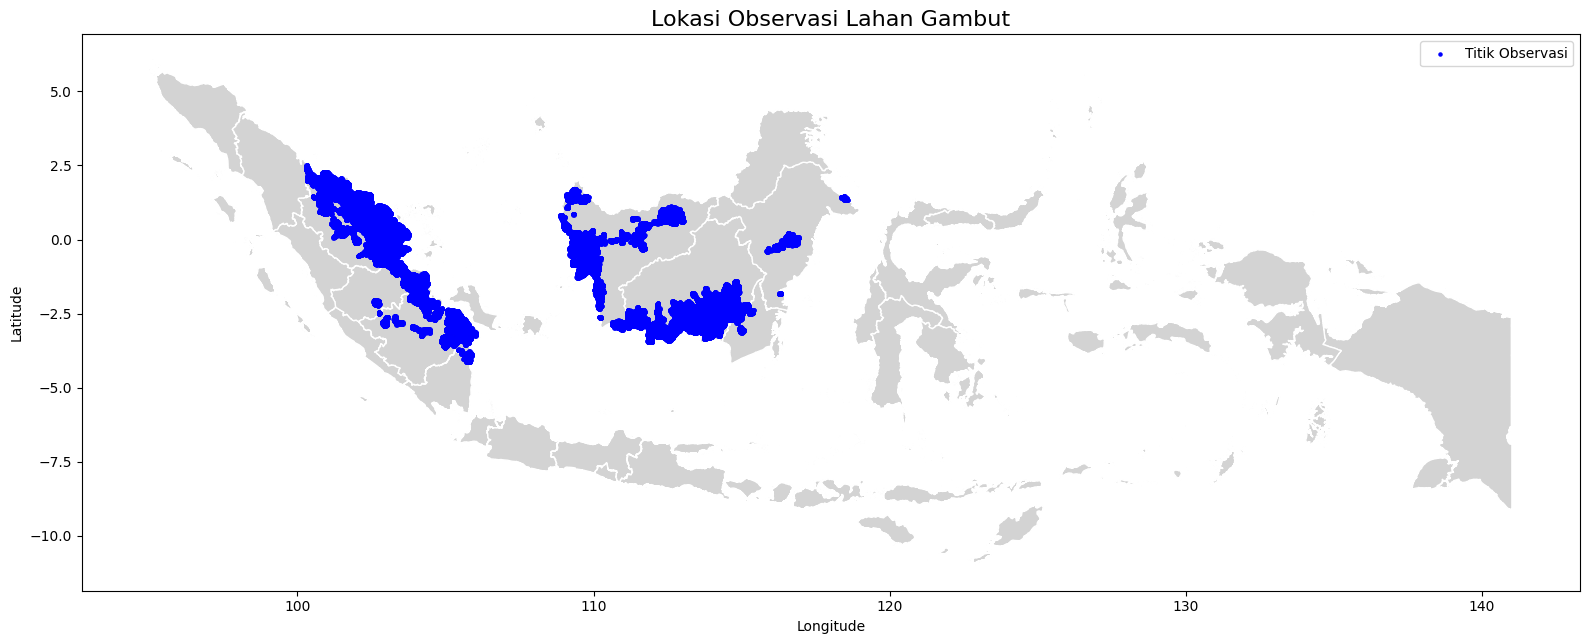

In [ ]:
# 2. Plot lokasi observasi

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Import data shp
shapefile_path = "batas.shp"
indonesia = gpd.read_file(shapefile_path)

# Konversi ke GeoDataFrame
df = pd.DataFrame(data)
geometry = [Point(xy) for xy in zip(df["Bujur"], df["Lintang"])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Plot shapefile Indonesia
fig, ax = plt.subplots(figsize=(16, 8))

indonesia.plot(ax=ax, color='lightgrey', edgecolor='white')

# Plot titik lokasi observasi
geo_df.plot(ax=ax, color='blue', markersize=5, label='Titik Observasi')

# Tambahkan judul dan label sumbu
plt.title("Lokasi Observasi Lahan Gambut", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 3. Banyak data
data.shape

(123516, 10)

In [ ]:
# 4. Cek NaN/Null
data.isnull().sum()

,0
Tinggi Muka Air,0
Jarak Terdekat ke Aktivitas Manusia,0
Ada atau Tidak Ladang,0
Ada atau Tidak Hutan,0
Ada atau Tidak Semak Belukar,0
Ada atau Tidak Perkebunan,0
Potensi Kerugian,0
Bujur,0
Lintang,0
Kemunculan Api,0


In [ ]:
# 5. Statistika deskriptif
statdes = data[['Tinggi Muka Air', 'Jarak Terdekat ke Aktivitas Manusia', 'Potensi Kerugian', 'Bujur', 'Lintang']].describe().round(3)
statdes.to_excel("statdes.xlsx")
statdes

,Tinggi Muka Air,Jarak Terdekat ke Aktivitas Manusia,Potensi Kerugian,Bujur,Lintang
count,123516.000,123516.000,1.235160e+05,123516.000,123516.000
mean,-0.528,4550.606,1.363875e+09,107.405,-0.902
std,0.341,4165.126,3.071271e+09,5.005,1.643
min,-1.887,1.860,1.611854e+07,100.301,-4.145
25%,-0.774,1370.809,2.286569e+08,102.752,-2.487
50%,-0.484,3226.123,5.089066e+08,105.491,-0.766
75%,-0.275,6581.507,1.427492e+09,112.599,0.486
max,0.228,25611.003,4.578265e+10,118.581,2.531


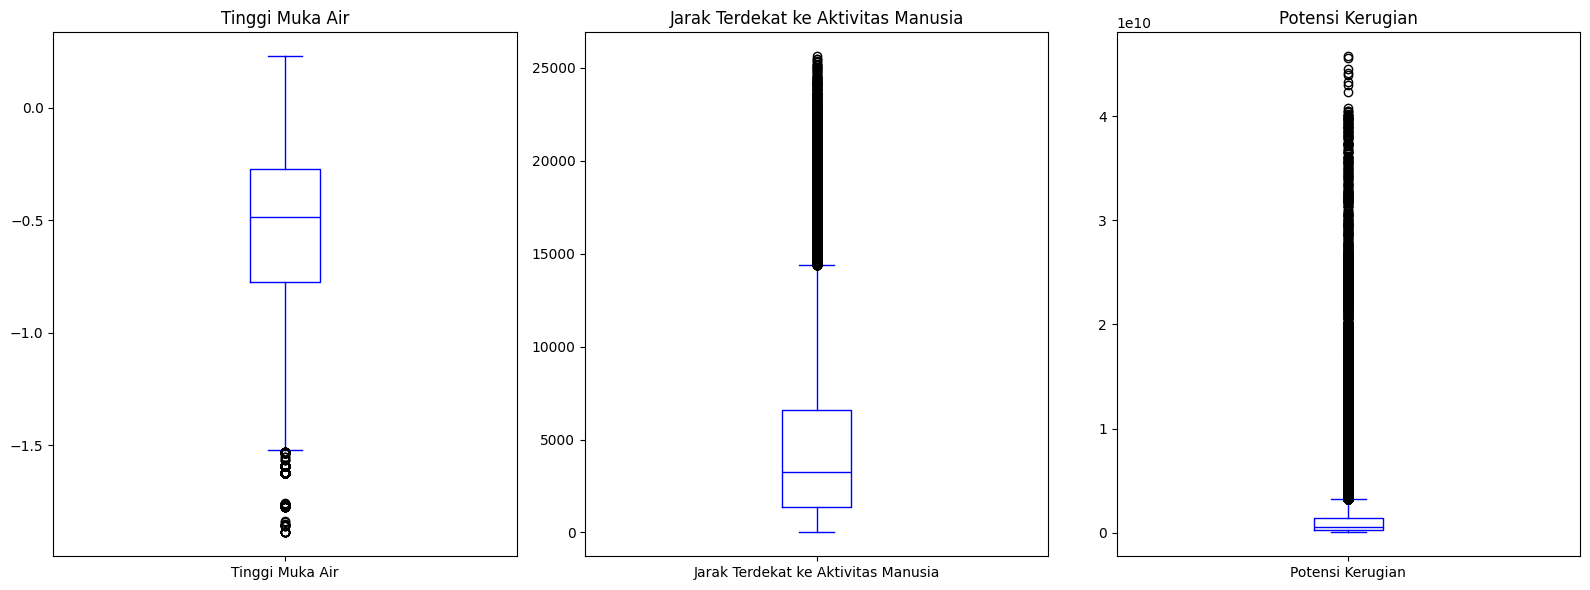

In [ ]:
# 6. Membuat boxplot

histo = data[['Tinggi Muka Air', 'Jarak Terdekat ke Aktivitas Manusia', 'Potensi Kerugian']]

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for i, column in enumerate(histo.columns):
    histo.boxplot(column=column,
                  ax=axes[i],
                  color='blue',
                  grid=False)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
# 7. Menghitung Frekuensi Absolut Ladang
data['Ada atau Tidak Ladang'].value_counts()

,count
Ada atau Tidak Ladang,
0,105219
1,18297


In [ ]:
# 8. Menghitung Frekuensi Absolut hutan
data['Ada atau Tidak Hutan'].value_counts()

,count
Ada atau Tidak Hutan,
0,90967
1,32549


In [ ]:
# 9. Menghitung Frekuensi Absolut Semak
data['Ada atau Tidak Semak Belukar'].value_counts()

,count
Ada atau Tidak Semak Belukar,
0,80693
1,42823


In [ ]:
# 10. Menghitung Frekuensi Absolut Kebun
data['Ada atau Tidak Perkebunan'].value_counts()

,count
Ada atau Tidak Perkebunan,
0,75370
1,48146


In [ ]:
# 11. Menghitung Frekuensi Absolut Kemunculan api
data['Kemunculan Api'].value_counts()

,count
Kemunculan Api,
Tidak,114962
Ya,8554


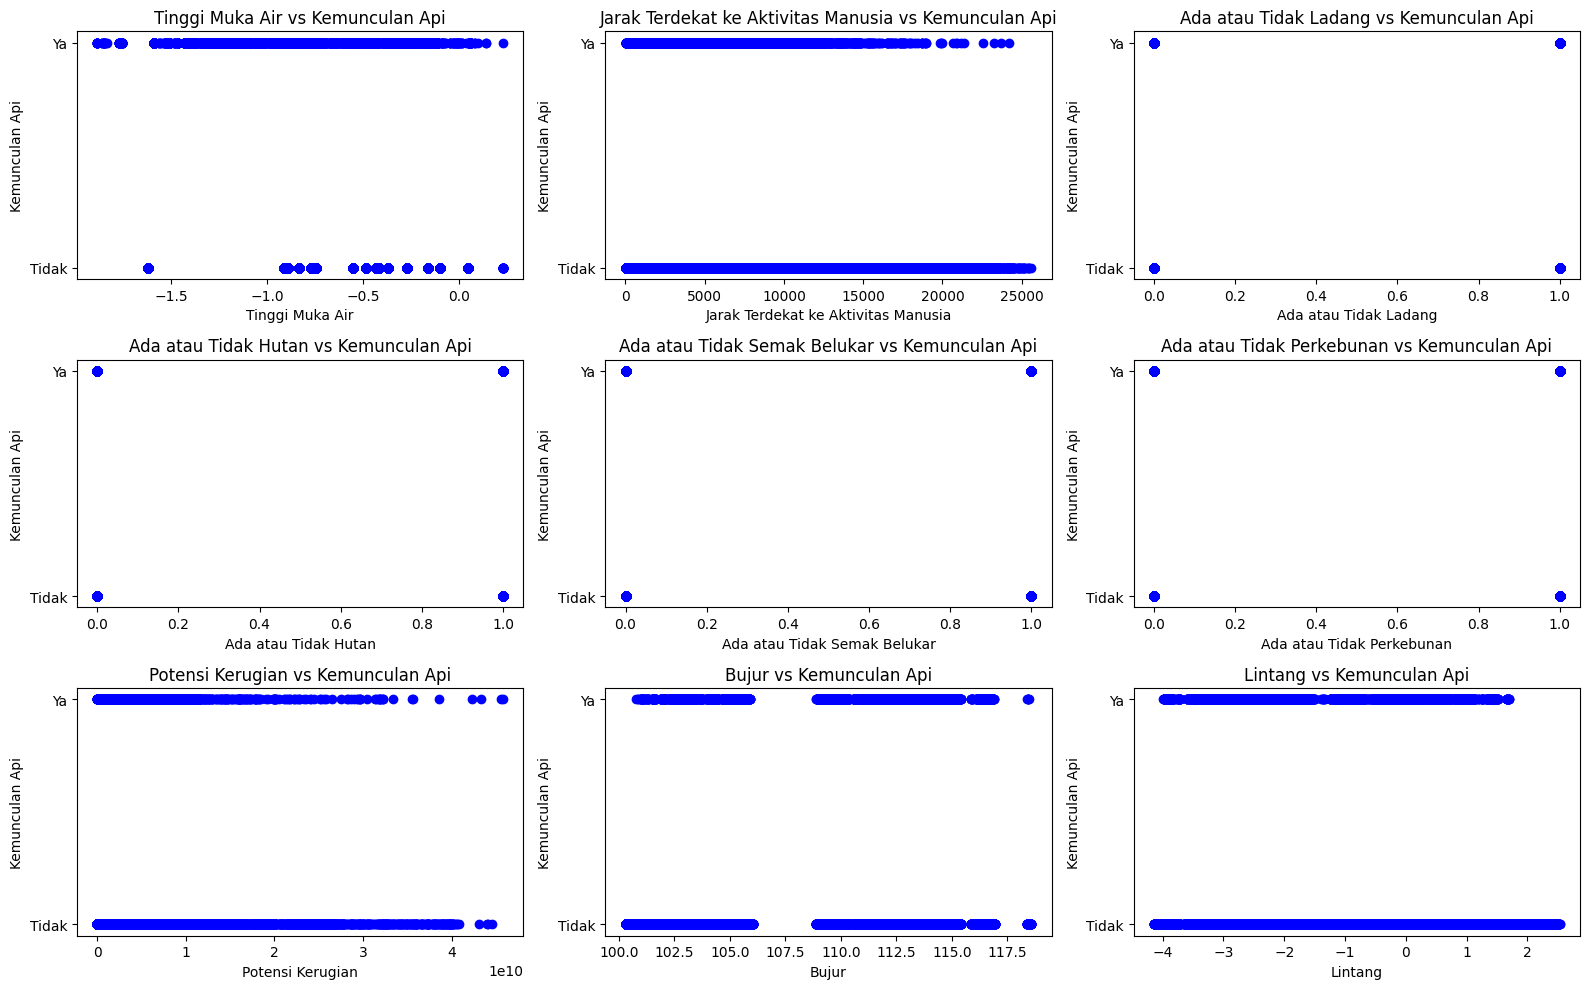

In [ ]:
# 12. Scatter plot antara masing-masing target terhadap fitur-fitur

import matplotlib.pyplot as plt

# Remove the duplicate 'Lintang' from the features list
features = ['Tinggi Muka Air', 'Jarak Terdekat ke Aktivitas Manusia', 'Ada atau Tidak Ladang', 'Ada atau Tidak Hutan', 'Ada atau Tidak Semak Belukar', 'Ada atau Tidak Perkebunan', 'Potensi Kerugian', 'Bujur', 'Lintang']
y_column = 'Kemunculan Api'

fig, axes = plt.subplots(3, 3, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(data[feature], data[y_column], color='blue')
    ax.set_xlabel(feature)
    ax.set_ylabel(y_column)
    ax.set_title(f'{feature} vs {y_column}')

# fig.delaxes(axes[-1]) # This line is no longer needed as there are now 9 features and 9 axes

plt.tight_layout()
plt.show()

In [ ]:
data[features].describe().round(3)

,Tinggi Muka Air,Jarak Terdekat ke Aktivitas Manusia,Ada atau Tidak Ladang,Ada atau Tidak Hutan,Ada atau Tidak Semak Belukar,Ada atau Tidak Perkebunan,Potensi Kerugian
count,123516.000,123516.000,123516.000,123516.000,123516.000,123516.000,1.235160e+05
mean,-0.528,4550.606,0.148,0.264,0.347,0.390,1.363875e+09
std,0.341,4165.126,0.355,0.441,0.476,0.488,3.071271e+09
min,-1.887,1.860,0.000,0.000,0.000,0.000,1.611854e+07
25%,-0.774,1370.809,0.000,0.000,0.000,0.000,2.286569e+08
50%,-0.484,3226.123,0.000,0.000,0.000,0.000,5.089066e+08
75%,-0.275,6581.507,0.000,1.000,1.000,1.000,1.427492e+09
max,0.228,25611.003,1.000,1.000,1.000,1.000,4.578265e+10


In [ ]:
# 14. Menghitung korelasi

data[features].corr().round(3)

,Tinggi Muka Air,Jarak Terdekat ke Aktivitas Manusia,Ada atau Tidak Ladang,Ada atau Tidak Hutan,Ada atau Tidak Semak Belukar,Ada atau Tidak Perkebunan,Potensi Kerugian,Bujur,Lintang
Tinggi Muka Air,1.000,-0.079,-0.072,0.121,-0.067,0.191,-0.420,-0.382,0.316
Jarak Terdekat ke Aktivitas Manusia,-0.079,1.000,-0.163,0.206,-0.129,-0.352,-0.176,0.194,-0.136
Ada atau Tidak Ladang,-0.072,-0.163,1.000,-0.063,0.164,-0.038,0.007,0.057,-0.063
Ada atau Tidak Hutan,0.121,0.206,-0.063,1.000,-0.127,-0.161,-0.034,-0.324,0.245
Ada atau Tidak Semak Belukar,-0.067,-0.129,0.164,-0.127,1.000,-0.081,0.040,0.096,-0.124
Ada atau Tidak Perkebunan,0.191,-0.352,-0.038,-0.161,-0.081,1.000,0.352,-0.369,0.412
Potensi Kerugian,-0.420,-0.176,0.007,-0.034,0.040,0.352,1.000,-0.117,0.045
Bujur,-0.382,0.194,0.057,-0.324,0.096,-0.369,-0.117,1.000,-0.577
Lintang,0.316,-0.136,-0.063,0.245,-0.124,0.412,0.045,-0.577,1.000


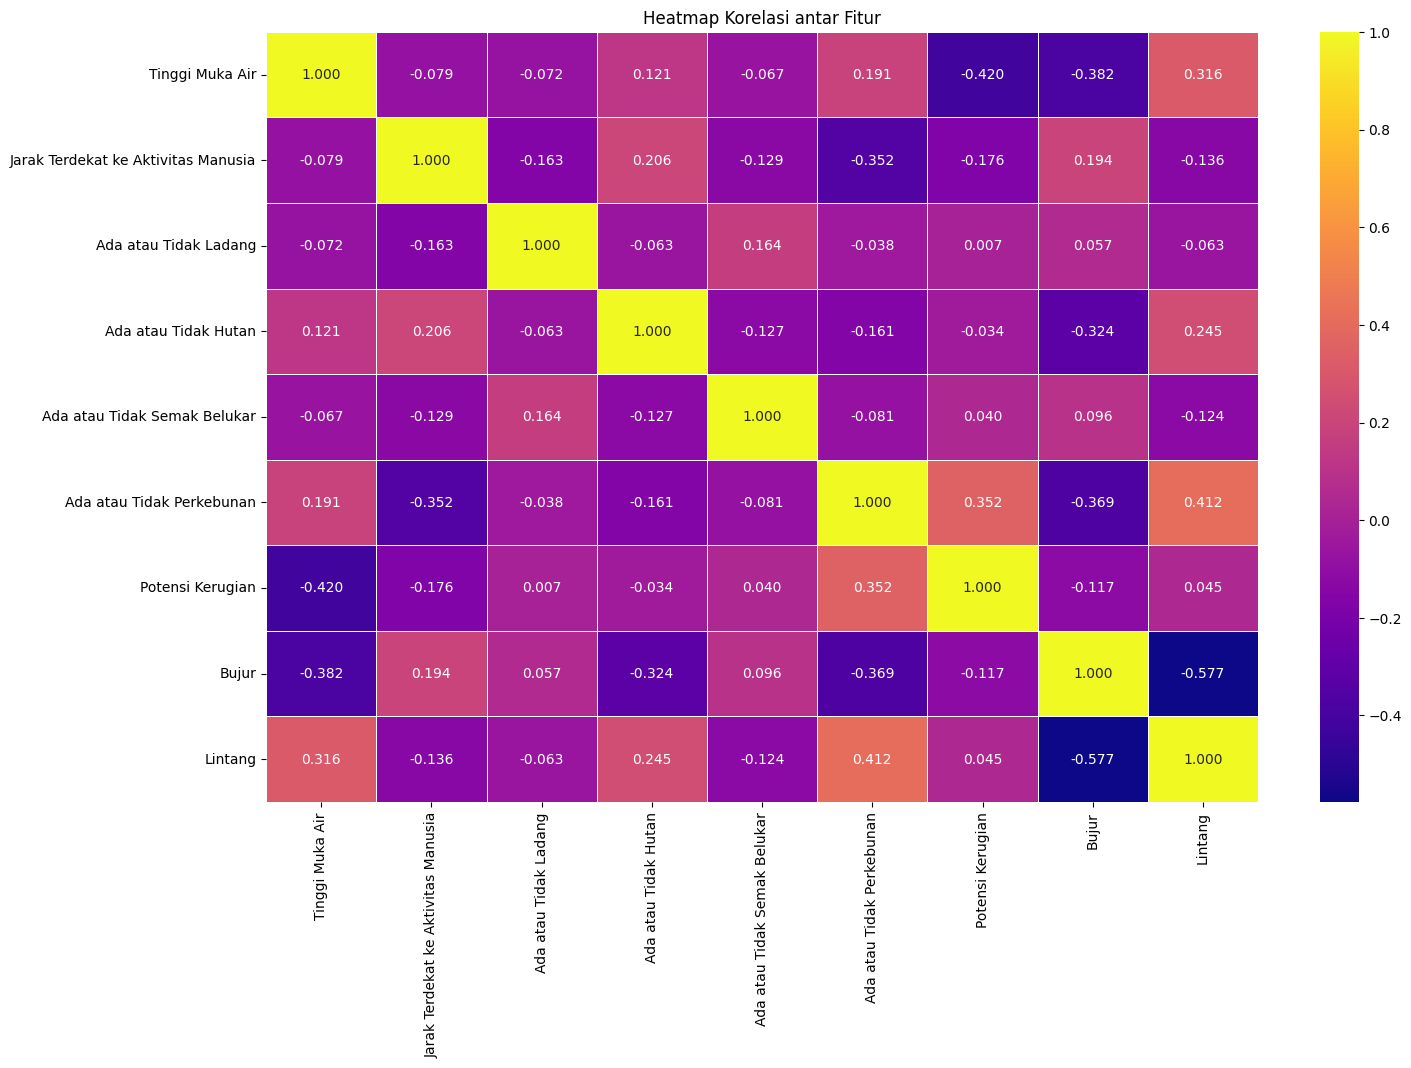

In [ ]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = data[features].corr().round(3)

# Membuat heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".3f", linewidths=.5)
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

#**2. PRINCIPAL COMPONENT ANALYSIS**

Data Setelah Standarisasi:
        Tinggi Muka Air  Jarak Terdekat ke Aktivitas Manusia  \
0                 1.250                               -0.895   
1                 1.250                               -0.946   
2                 1.250                               -0.889   
3                 1.250                               -0.959   
4                 1.250                               -0.972   
...                 ...                                  ...   
123511           -1.068                               -0.518   
123512           -1.068                               -0.624   
123513           -1.068                               -0.762   
123514           -1.068                               -0.820   
123515           -1.068                               -0.785   

        Ada atau Tidak Ladang  Ada atau Tidak Hutan  \
0                      -0.417                -0.598   
1                      -0.417                -0.598   
2                      -0.417          

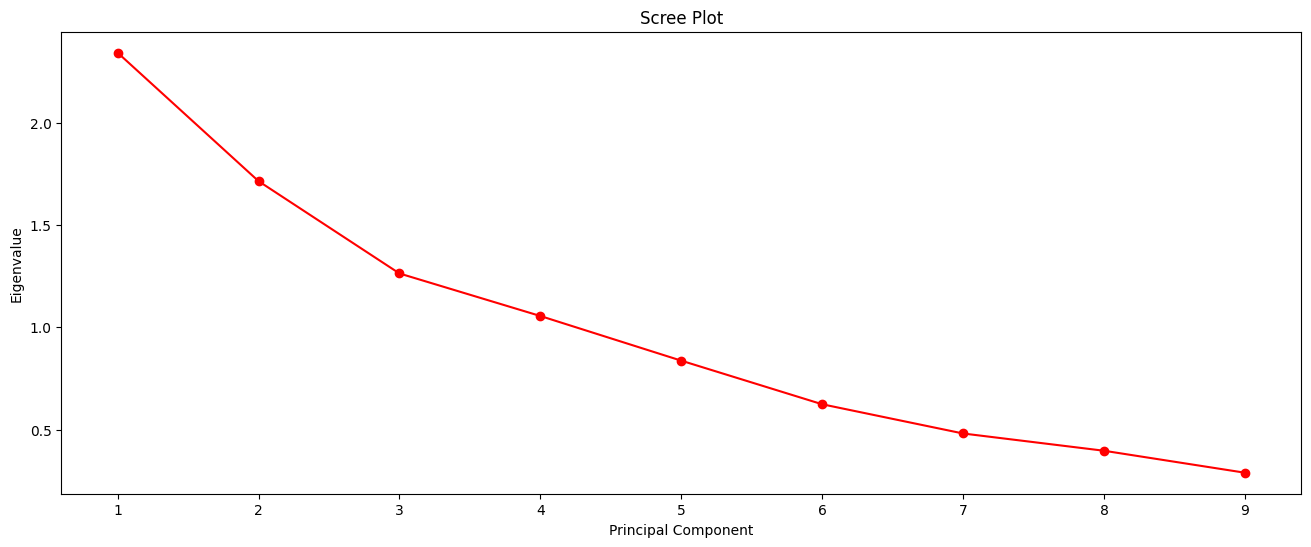

In [ ]:
# 1. Proses perhitungan PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

def muat_data(df, nama_sheet=0):
    return df

def standarisasi_data(df):
    numeric_df = df.select_dtypes(include=np.number)
    return (numeric_df - numeric_df.mean()) / numeric_df.std()

def hitung_matriks_kovariansi(df):
    return df.cov()

def lakukan_pca(df):
    matriks_kov = hitung_matriks_kovariansi(df)
    nilai_eigen, vektor_eigen = eig(matriks_kov)

    # Mengurutkan nilai eigen dan vektor eigen dari besar ke kecil
    indeks_urut = np.argsort(nilai_eigen)[::-1]
    nilai_eigen = nilai_eigen[indeks_urut]
    vektor_eigen = vektor_eigen[:, indeks_urut]

    return nilai_eigen, vektor_eigen

def hitung_kualitas_model(nilai_eigen):
    return nilai_eigen / np.sum(nilai_eigen) * 100

def hitung_faktor_loading(vektor_eigen, nilai_eigen):
    return vektor_eigen * np.sqrt(nilai_eigen)

def scree_plot(nilai_eigen):
    plt.figure(figsize=(16, 6))
    plt.plot(np.arange(1, len(nilai_eigen) + 1), nilai_eigen, 'o-', color='red')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.grid(False)
    plt.show()

def utama(df, nama_sheet=0):
    df = muat_data(df, nama_sheet)
    df_terstandarisasi = standarisasi_data(df)
    nilai_eigen, vektor_eigen = lakukan_pca(df_terstandarisasi)
    kualitas_model = hitung_kualitas_model(nilai_eigen)
    faktor_loading = hitung_faktor_loading(vektor_eigen, nilai_eigen)

    # Menampilkan hasil
    print("Data Setelah Standarisasi:")
    print(df_terstandarisasi.round(3))
    print("\nMatriks Kovariansi:")
    print(hitung_matriks_kovariansi(df_terstandarisasi).round(3))
    print("\nNilai Eigen:")
    print(nilai_eigen.round(3))
    print("\nVektor Eigen:")
    print(vektor_eigen.round(3))
    print("\nKualitas Model (% Variansi Tiap Komponen):")
    print(kualitas_model.round(2))
    print("\nFaktor Loading:")
    print(faktor_loading.round(3))

    scree_plot(nilai_eigen)

    return nilai_eigen, vektor_eigen, kualitas_model, faktor_loading, df_terstandarisasi

features = [
'Tinggi Muka Air',
'Jarak Terdekat ke Aktivitas Manusia',
'Ada atau Tidak Ladang',
             'Ada atau Tidak Hutan',
             'Ada atau Tidak Semak Belukar',
             'Ada atau Tidak Perkebunan',
             'Potensi Kerugian',
             'Bujur',
             'Lintang'
]

# panggil fungsi utama:
nilai_eigen, vektor_eigen, kualitas_model, faktor_loading, df_terstandarisasi = utama(data[features])

In [ ]:
# 2. Hasil standarisasi data

datas = pd.DataFrame(df_terstandarisasi)
datas.round(3)

,Tinggi Muka Air,Jarak Terdekat ke Aktivitas Manusia,Ada atau Tidak Ladang,Ada atau Tidak Hutan,Ada atau Tidak Semak Belukar,Ada atau Tidak Perkebunan,Potensi Kerugian,Bujur,Lintang
0,1.250,-0.895,-0.417,-0.598,-0.728,1.251,-0.235,-1.419,2.073
1,1.250,-0.946,-0.417,-0.598,-0.728,1.251,-0.191,-1.419,2.068
2,1.250,-0.889,-0.417,-0.598,-0.728,1.251,-0.257,-1.419,2.062
3,1.250,-0.959,-0.417,-0.598,-0.728,1.251,-0.268,-1.419,2.057
4,1.250,-0.972,-0.417,-0.598,-0.728,1.251,-0.098,-1.419,2.051
...,...,...,...,...,...,...,...,...,...
123511,-1.068,-0.518,-0.417,-0.598,-0.728,-0.799,-0.340,2.231,1.377
123512,-1.068,-0.624,-0.417,-0.598,-0.728,-0.799,-0.337,2.231,1.371
123513,-1.068,-0.762,-0.417,-0.598,-0.728,-0.799,-0.334,2.231,1.366
123514,-1.068,-0.820,-0.417,-0.598,-0.728,-0.799,-0.334,2.233,1.371


In [ ]:
# 3. Model PC yang terbentuk

PC1=0.353*datas['Tinggi Muka Air']-0.227*datas['Jarak Terdekat ke Aktivitas Manusia']-0.076*datas['Ada atau Tidak Ladang']+0.186*datas['Ada atau Tidak Hutan']-0.134*datas['Ada atau Tidak Semak Belukar']+0.432*datas['Ada atau Tidak Perkebunan']+0.088*datas['Potensi Kerugian']-0.544*datas['Bujur']+0.525*datas['Lintang']
PC2=-0.327*datas['Tinggi Muka Air']-0.457*datas['Jarak Terdekat ke Aktivitas Manusia']+0.225*datas['Ada atau Tidak Ladang']-0.409*datas['Ada atau Tidak Hutan']+0.243*datas['Ada atau Tidak Semak Belukar']+0.372*datas['Ada atau Tidak Perkebunan']+0.510*datas['Potensi Kerugian']+0.063*datas['Bujur']-0.064*datas['Lintang']
PC3=-0.482*datas['Tinggi Muka Air']+0.322*datas['Jarak Terdekat ke Aktivitas Manusia']-0.381*datas['Ada atau Tidak Ladang']+0.289*datas['Ada atau Tidak Hutan']-0.378*datas['Ada atau Tidak Semak Belukar']+0.047*datas['Ada atau Tidak Perkebunan']+0.536*datas['Potensi Kerugian']-0.037*datas['Bujur']+0.042*datas['Lintang']

data_baru = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'PC3': PC3})
data_baru.round(3)

,PC1,PC2,PC3
0,3.043,0.097,-0.557
1,3.056,0.143,-0.550
2,3.034,0.084,-0.567
3,3.046,0.111,-0.596
4,3.061,0.204,-0.509
...,...,...,...
123511,-1.107,0.141,0.365
123512,-1.086,0.192,0.332
123513,-1.057,0.257,0.289
123514,-1.042,0.283,0.270


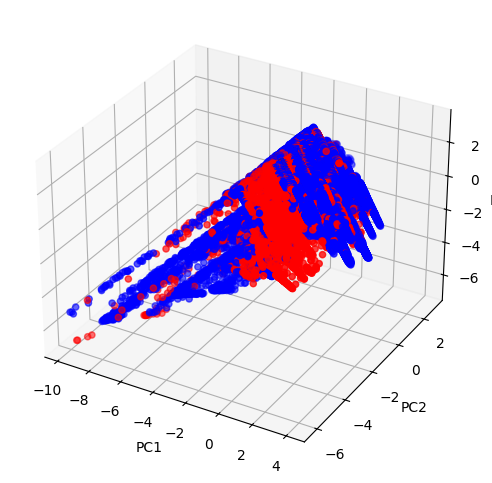

In [ ]:
# Plot 3d

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_baru = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'PC3': PC3})

# Membentuk plot 3d
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue' if (data.loc[i, 'Kemunculan Api']) == 'Tidak' else 'red' for i in data.index]

# Plot data
ax.scatter(data_baru['PC1'], data_baru['PC2'], data_baru['PC3'], color = colors)

# Tambahkan label
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()
ax.grid(False)

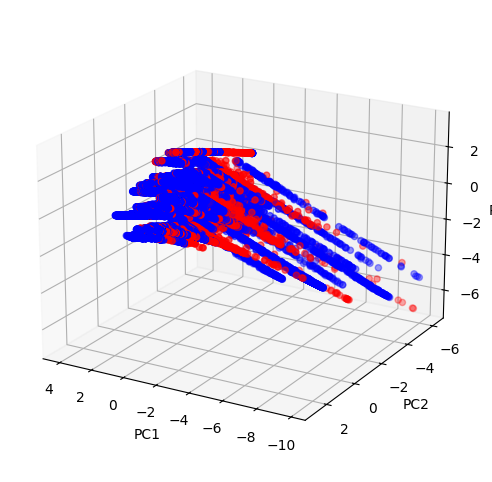

In [ ]:
# Plot 3d PCA

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_baru = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'PC3': PC3})

# Membuat plot 3d
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue' if (data.loc[i, 'Kemunculan Api']) == 'Tidak' else 'red' for i in data.index]

# Plot data
ax.scatter(data_baru['PC1'], data_baru['PC2'], data_baru['PC3'], color = colors)

# Tambahkan label
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Atur sudut pandang
ax.view_init(elev=20, azim=120)

plt.show()
ax.grid(False)

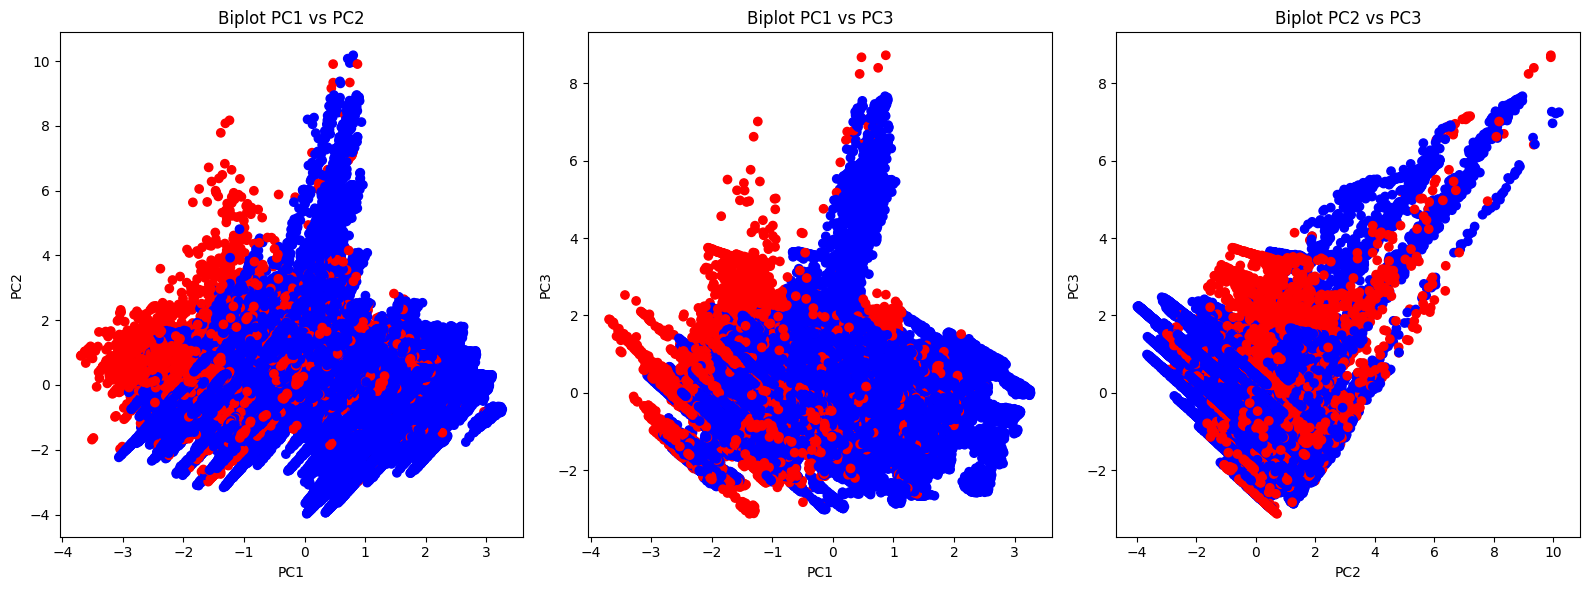

In [ ]:
# Biplot PC

pc = [('PC1', 'PC2'), ('PC1', 'PC3'), ('PC2', 'PC3')]

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

colors = ['blue' if (data.loc[i, 'Kemunculan Api']) == 'Tidak' else 'red' for i in data.index]

for ax, (pc_x, pc_y) in zip(axes.flatten(), pc):
    ax.scatter(data_baru[pc_x], data_baru[pc_y], color=colors)
    ax.set_xlabel(pc_x)
    ax.set_ylabel(pc_y)
    ax.set_title(f'Biplot {pc_x} vs {pc_y}')

plt.tight_layout()
plt.show()

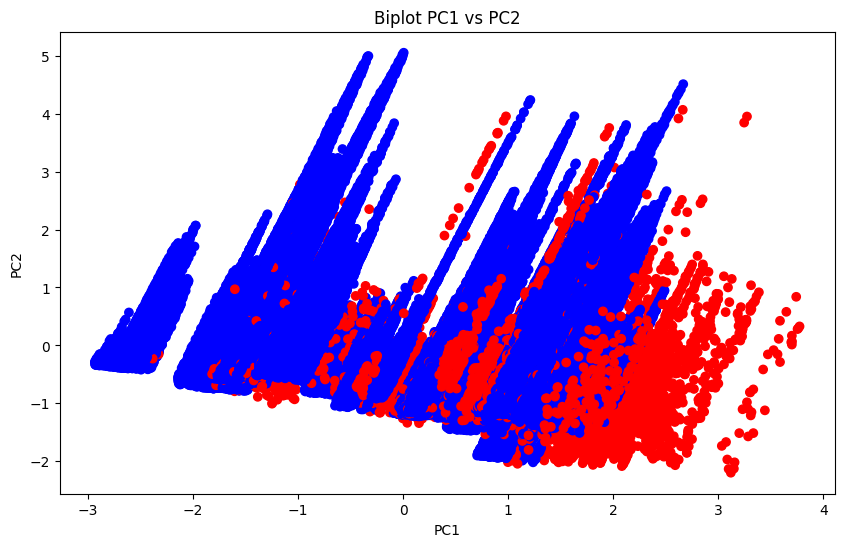

In [ ]:
colors = ['blue' if (data.loc[i, 'Kemunculan Api']) == 'Tidak' else 'red' for i in data.index]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data_baru['PC1'], data_baru['PC2'], color=colors)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Biplot PC1 vs PC2')

plt.show()